**Autor:** [Boris Timko](mailto:5346398@upjs.sk)

**Podporné materiály k bakalárskej práci <i>VLASTNOSTI A VYUŽITIE STOCHASTICKEJ
DOMINANCIE</i>**

***

<br>

**<font size=10 color=brown> Stochasticka dominancia a Value at Risk </font>**

<br>
---
V tom to Jupyter notebooku venovanom prepojeniu dvoch kľúčových konceptov z oblasti  rizika a rozhodovania pri neistote:

1. **Value at Risk (VaR)** - bežná miera na kvantifikáciu možných strát investície pri určenej úrovni spoľahlivosti.  
2. **Stochastická dominancia prvého rádu (FSD)** - poradie náhodných výnosov založené na porovnaní ich distribučných funkcií.

V tomto notebooku:
-  ukážeme, že ak náhodná premenná $X$ stochasticky dominuje $Y$ (teda $F_X(t)\le F_Y(t)$ pre všetky $t$), potom pri každej úrovni spoľahlivosti $\alpha$ platí  
  $VaR_X(\alpha)\le VaR_Y(\alpha)$, kde stratu berieme ako záporný zisk
- vizualizujeme distribučné funkcie a hustoty strát dvoch nahodných premenných;  
- vykreslíme  VaR pre jednu úroveň $\alpha$ aj ako funkciu $VaR(\alpha)$ pre viacero hodnôt $\alpha$;  
- umožníme si meniť parametre (napr. počiatočný kapitál $W_0$, priemer a rozptyl návratností) a okamžite vidieť dopad na grafy.

In [ ]:
# načítanie balíkov
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, binom, poisson, uniform, lognorm

## VaR dvoch normálnych rozdelení

Z tých troch panelov plynie jasná úloha:

1. **Distribučné funkcie (CDF)**  
   Zelená $F_Y(t)$ je vždy „vpravo“ od fialovej $F_X(t)$, čo znamená, že pri každej hodnote $t$ platí  
   $
     F_X(t)\;\le\;F_Y(t).
   $  
   To je práve definícia prvého rádu stochastickej dominancie: $X\succ_{\mathrm{FSD}}Y$.

2. **Distribúcia strát & prahy VaR (α=0,10)**  
   Straty definujeme ako  
   $
     L = W_0 - X,\quad W_0$  - je počiatočná invetícia a X náhodný budúci výnos
    
   Zelená krivka má 90% VaR okolo $\approx94{,}28$, fialová $\approx95{,}32$.  
   Nižšia VaR pre $X$ znamená, že pri 90% spoľahlivosti očakávame horšiu stratu maximálne  
   $100 - 94{,}28 = 5{,}72$ pre $X$, kým pre $Y$ až $100 - 95{,}32 = 4{,}68$. Výhodnejšíe je $X$.

3. **Ukážkové body a plná funkcia VaR($\alpha$)**  
   Pre všetky vybrané hladiny $\alpha = 5\%$ platí  
   $
     VaR_X(\alpha)\;\le\;VaR_Y(\alpha).
   $  
   Zelená krivka (VaR$_X$) leží vždy pod fialovou (VaR$_Y$), teda $X$ prináša nižšie maximálne straty pri akejkoľvek úrovni spoľahlivosti.

---

### Záver

Hoci má $X$ väčší rozptyl návratností, vďaka vyššiemu priemeru ($\mu_X=7$ vs. $\mu_Y=5$) platí  
$
  VaR_X(\alpha)\;\le\;VaR_Y(\alpha)
  \quad\forall\,\alpha\in(0,1).
$  
To znamená, že $X$ stochasticky dominuje $Y$ prvého rádu a na každej úrovni spoľahlivosti prináša menšie alebo rovnaké riziko straty.


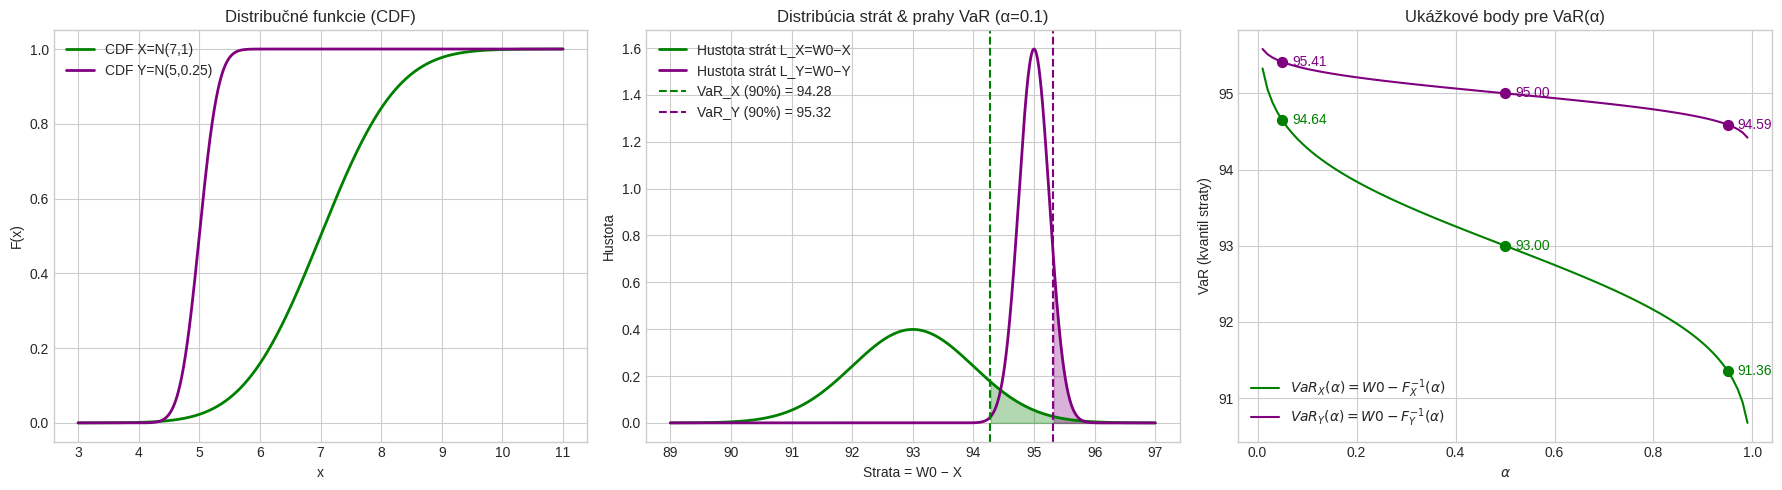

In [59]:
# --- Parametre rozdelení X, Y
mu_X, sigma_X = 7, 1
mu_Y, sigma_Y = 5, 0.25

# --- Počiatočný kapitál W0 pre výpočet strát L = W0 – X
W0 = 100

# --- Vypočítame CDF X, Y pre zobrazenie stochastickej dominancie
x = np.linspace(
    min(mu_X - 4*sigma_X, mu_Y - 4*sigma_Y),
    max(mu_X + 4*sigma_X, mu_Y + 4*sigma_Y), 1000
)
F_X = norm.cdf(x, loc=mu_X, scale=sigma_X)
F_Y = norm.cdf(x, loc=mu_Y, scale=sigma_Y)

# --- Distribúcia strát L_X = W0 – X, L_Y = W0 – Y
l = np.linspace(
    min(W0 - mu_X - 4*sigma_X, W0 - mu_Y - 4*sigma_Y),
    max(W0 - mu_X + 4*sigma_X, W0 - mu_Y + 4*sigma_Y), 1000
)
pdf_LX = norm.pdf(l, loc=W0 - mu_X, scale=sigma_X)
pdf_LY = norm.pdf(l, loc=W0 - mu_Y, scale=sigma_Y)

# --- VaR funkcie pre všetky α
alphas = np.linspace(0.01, 0.99, 99)
VaR_X = W0 - norm.ppf(alphas, loc=mu_X, scale=sigma_X)
VaR_Y = W0 - norm.ppf(alphas, loc=mu_Y, scale=sigma_Y)

# --- Jediný prah VaR pre α=0.10 (90 %)
alpha0 = 0.10
p0 = int((1 - alpha0) * 100)
V_X0 = W0 - norm.ppf(alpha0, loc=mu_X, scale=sigma_X)
V_Y0 = W0 - norm.ppf(alpha0, loc=mu_Y, scale=sigma_Y)

# --- Ukážkové body VaR pre pár hladín α
alphas_demo = [0.05, 0.50, 0.95]
VaR_X_demo = [W0 - norm.ppf(a, loc=mu_X, scale=sigma_X) for a in alphas_demo]
VaR_Y_demo = [W0 - norm.ppf(a, loc=mu_Y, scale=sigma_Y) for a in alphas_demo]

# --- Vykreslenie v rozložení
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1) Distribučné funkcie (CDF)
axs[0].plot(x, F_X, lw=2, label=f'CDF X=N({mu_X},{sigma_X})', color='green')
axs[0].plot(x, F_Y, lw=2, label=f'CDF Y=N({mu_Y},{sigma_Y})', color='purple')
axs[0].set_title('Distribučné funkcie (CDF)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('F(x)')
axs[0].legend()
axs[0].grid(True)

# 2) Distribúcia strát a prahy VaR (α=0.10)
axs[1].plot(l, pdf_LX, lw=2, label='Hustota strát L_X=W0−X', color='green')
axs[1].plot(l, pdf_LY, lw=2, label='Hustota strát L_Y=W0−Y', color='purple')
axs[1].axvline(V_X0, color='green', ls='--',
               label=f'VaR_X ({p0}%) = {V_X0:.2f}')
axs[1].axvline(V_Y0, color='purple', ls='--',
               label=f'VaR_Y ({p0}%) = {V_Y0:.2f}')
axs[1].fill_between(l, 0, pdf_LX, where=(l >= V_X0), color='green', alpha=0.3)
axs[1].fill_between(l, 0, pdf_LY, where=(l >= V_Y0), color='purple', alpha=0.3)
axs[1].set_title(f'Distribúcia strát & prahy VaR (α={alpha0})')
axs[1].set_xlabel('Strata = W0 − X')
axs[1].set_ylabel('Hustota')
axs[1].legend()
axs[1].grid(True)

# 3) Ukážkové body a plná funkcia VaR(α)
axs[2].plot(alphas, VaR_X, color='green', lw=1.5,
            label=r'$VaR_X(\alpha)=W0 - F_X^{-1}(\alpha)$')
axs[2].plot(alphas, VaR_Y, color='purple', lw=1.5,
            label=r'$VaR_Y(\alpha)=W0 - F_Y^{-1}(\alpha)$')
for a, vx, vy in zip(alphas_demo, VaR_X_demo, VaR_Y_demo):
    # body pre X
    axs[2].scatter(a, vx, color='green', s=50, zorder=5)
    axs[2].text(a + 0.02, vx, f'{vx:.2f}', color='green', va='center')
    # body pre Y
    axs[2].scatter(a, vy, color='purple', s=50, zorder=5)
    axs[2].text(a + 0.02, vy, f'{vy:.2f}', color='purple', va='center')

axs[2].set_title('Ukážkové body pre VaR(α)')
axs[2].set_xlabel(r'$\alpha$')
axs[2].set_ylabel('VaR (kvantil straty)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


##Výsledky pre Uniform(0,2) vs Lognormal(σ=0.5) rozdelenie

1. **Distribučné funkcie (CDF)**  
   - Pre malé hodnoty $t$ je $F_{\text{Uniform}}(t) > F_{\text{Lognormal}}(t)$,  
     potom sa grafy pretnú a pre väčšie $t$ platí $F_{\text{Uniform}}(t) < F_{\text{Lognormal}}(t)$.  
   - Tým pádom nemáme $F_X(t)\le F_Y(t)$ pre všetky $t$ a neplatí stochastická dominancia prvého rádu.

2. **Distribúcia strát & prahy VaR (α=95 %)**  
   - Strata definovaná ako $L = W_0 - Z$ s $W_0=100$.  
   - Pre Uniform(0,2) dostávame 95 % VaR = $100 - 2 = 98.00$.  
   - Pre Lognormal(σ=0.5) je 95 % VaR ≈ 97.72, t. j. pri tejto hladine „horšiu“ maximálnu stratu očakávame z Uniform rozdelenia.

3. **VaR funkcie pre rôzne α**  
   - Krivky $VaR_X(\alpha)$ a $VaR_Y(\alpha)$ sa vzájomne pretínajú.  
   - Pre niektoré hodnoty spoľahlivosti má väčší VaR Uniform, pre iné Lognormal.  

---

**Záver:**  
Uniform(0,2) ani Lognormal(σ=0.5) si navzájom nedominujú v zmysle FSD. Preto poradie ich VaR hodnôt závisí od $\alpha$ – niektoré úrovne spoľahlivosti uprednostňujú Uniform, iné Lognormal. Je teda dôležité vždy  uviesť, na akej hladine rizika VaR porovnanie robíme.

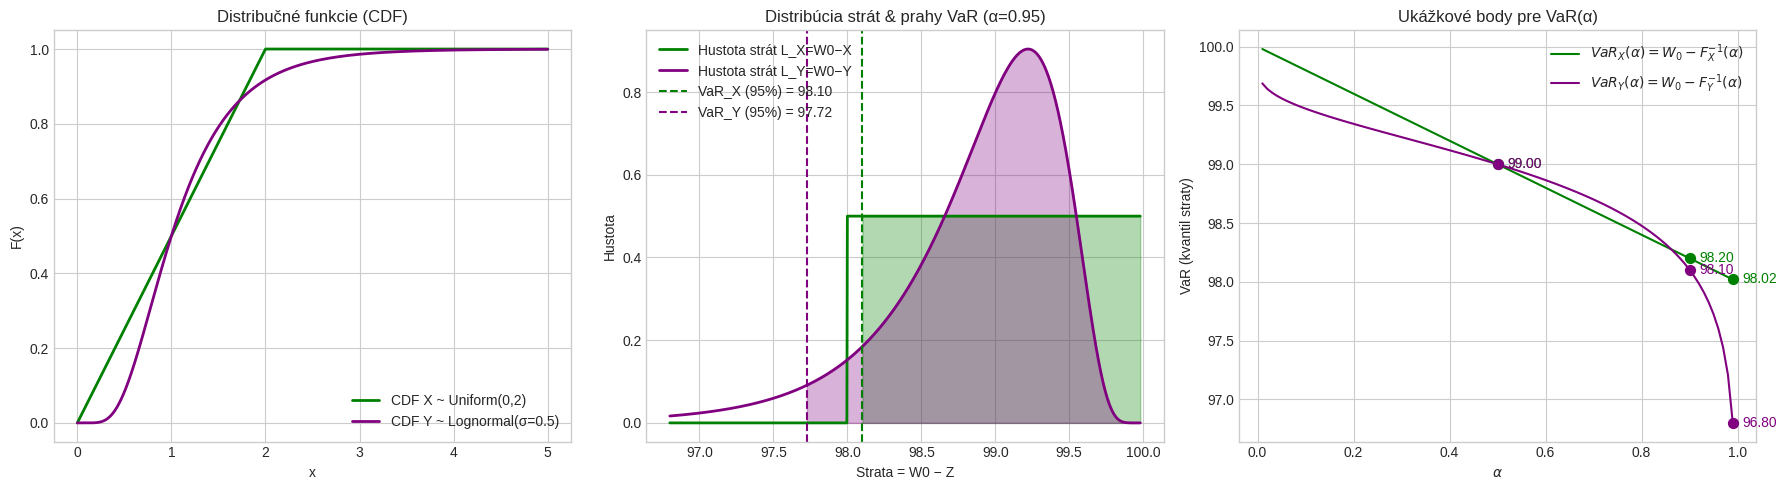

In [ ]:
# --- Parametre rozdelení X, Y
dist_X = uniform(loc=0, scale=2)          # X ~ Uniform(0,2)
dist_Y = lognorm(s=0.5, scale=1)           # Y ~ Lognormal(shape=0.5, scale=1)

# --- Počiatočný kapitál W0 pre výpočet strát L = W0 − Z
W0 = 100

# --- Vypočítame CDF X, Y pre stochastickú dominanciu
x = np.linspace(0, 5, 1000)
F_X = dist_X.cdf(x)
F_Y = dist_Y.cdf(x)

# --- Rozsah strát podľa 1. a 99. percentilu
z01_X, z99_X = dist_X.ppf(0.01), dist_X.ppf(0.99)
z01_Y, z99_Y = dist_Y.ppf(0.01), dist_Y.ppf(0.99)
l_min = W0 - max(z99_X, z99_Y)
l_max = W0 - min(z01_X, z01_Y)
l = np.linspace(l_min, l_max, 1000)

# --- Hustota strát L_X = W0−X, L_Y = W0−Y
pdf_LX = dist_X.pdf(W0 - l)
pdf_LY = dist_Y.pdf(W0 - l)

# --- Full VaR funkcie VaR(α) = W0 − F^{-1}(α)
alphas = np.linspace(0.01, 0.99, 99)
VaR_X = W0 - dist_X.ppf(alphas)
VaR_Y = W0 - dist_Y.ppf(alphas)

# --- Jediný prah VaR pre α=0.95 (95 %)
alpha0 = 0.95
p0 = int(alpha0 * 100)
V_X0 = W0 - dist_X.ppf(alpha0)
V_Y0 = W0 - dist_Y.ppf(alpha0)

# --- Ukážkové body VaR pre pár hladín α
alphas_demo = [0.5, 0.9, 0.99]
VaR_X_demo = [W0 - dist_X.ppf(a) for a in alphas_demo]
VaR_Y_demo = [W0 - dist_Y.ppf(a) for a in alphas_demo]

# --- Vykreslenie v rozložení 1×3
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1) Distribučné funkcie (CDF)
axs[0].plot(x, F_X, lw=2, label='CDF X ~ Uniform(0,2)', color='green')
axs[0].plot(x, F_Y, lw=2, label='CDF Y ~ Lognormal(σ=0.5)', color='purple')
axs[0].set_title('Distribučné funkcie (CDF)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('F(x)')
axs[0].legend()
axs[0].grid(True)

# 2) Distribúcia strát a prahy VaR (α=0.95)
axs[1].plot(l, pdf_LX, lw=2, label='Hustota strát L_X=W0−X', color='green')
axs[1].plot(l, pdf_LY, lw=2, label='Hustota strát L_Y=W0−Y', color='purple')
axs[1].axvline(V_X0, color='green', ls='--',
               label=f'VaR_X ({p0}%) = {V_X0:.2f}')
axs[1].axvline(V_Y0, color='purple', ls='--',
               label=f'VaR_Y ({p0}%) = {V_Y0:.2f}')
axs[1].fill_between(l, 0, pdf_LX, where=(l >= V_X0), color='green', alpha=0.3)
axs[1].fill_between(l, 0, pdf_LY, where=(l >= V_Y0), color='purple', alpha=0.3)
axs[1].set_title(f'Distribúcia strát & prahy VaR (α={alpha0})')
axs[1].set_xlabel('Strata = W0 − Z')
axs[1].set_ylabel('Hustota')
axs[1].legend()
axs[1].grid(True)

# 3) Ukážkové body a plná funkcia VaR(α)
axs[2].plot(alphas, VaR_X, color='green', lw=1.5,
            label=r'$VaR_X(\alpha)=W_0 - F_X^{-1}(\alpha)$')
axs[2].plot(alphas, VaR_Y, color='purple', lw=1.5,
            label=r'$VaR_Y(\alpha)=W_0 - F_Y^{-1}(\alpha)$')
for a, vx, vy in zip(alphas_demo, VaR_X_demo, VaR_Y_demo):
    axs[2].scatter(a, vx, color='green', s=50, zorder=5)
    axs[2].text(a + 0.02, vx, f'{vx:.2f}', color='green', va='center')
    axs[2].scatter(a, vy, color='purple', s=50, zorder=5)
    axs[2].text(a + 0.02, vy, f'{vy:.2f}', color='purple', va='center')

axs[2].set_title('Ukážkové body pre VaR(α)')
axs[2].set_xlabel(r'$\alpha$')
axs[2].set_ylabel('VaR (kvantil straty)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
